In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('pc_tertiary.csv')

In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

x = df[['RMSD', 'F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9']]
y = df['F4']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=0.04984192943467643, l1_ratio=0.09834971704288592, max_iter=999999999)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 10.010915639161436
R2 Score: 0.933944500292958


In [86]:
import numpy as np
from sklearn.linear_model import ElasticNet
from hyperopt import hp, fmin, tpe, Trials

# Define the search space for hyperparameters
space = {
    'alpha': hp.loguniform('alpha', -2, 0.1),  # Narrowed down the search space
    'l1_ratio': hp.uniform('l1_ratio', 0, 0.15)
}

# Define the objective function to minimize
def objective(params):
    clf = ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio'])
    clf.fit(x_train, y_train)
    mse = clf.score(x_test, y_test)
    return -mse  # Note: we're minimizing the negative MSE

# Perform Bayesian optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=100)

# Print the best hyperparameters and corresponding MSE
print('Best hyperparameters:', best)
print('Best MSE:', -trials.best_trial['result']['loss'])

  1%|          | 1/100 [00:00<00:48,  2.05trial/s, best loss: -0.9338463439718657]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.767e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  2%|▏         | 2/100 [00:01<00:50,  1.95trial/s, best loss: -0.9338692124803947]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.759e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  3%|▎         | 3/100 [00:01<00:50,  1.90trial/s, best loss: -0.9338913467586138]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  4%|▍         | 4/100 [00:02<00:52,  1.83trial/s, best loss: -0.9339208509794703]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  5%|▌         | 5/100 [00:02<00:52,  1.80trial/s, best loss: -0.9339208509794703]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.765e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  6%|▌         | 6/100 [00:03<00:52,  1.80trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  7%|▋         | 7/100 [00:05<01:39,  1.07s/trial, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.771e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  8%|▊         | 8/100 [00:07<02:14,  1.47s/trial, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.748e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



  9%|▉         | 9/100 [00:08<01:46,  1.18s/trial, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 10%|█         | 10/100 [00:08<01:27,  1.03trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 11%|█         | 11/100 [00:09<01:15,  1.17trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 12%|█▏        | 12/100 [00:09<01:06,  1.32trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.752e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 13%|█▎        | 13/100 [00:10<01:00,  1.43trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.766e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 14%|█▍        | 14/100 [00:10<00:54,  1.57trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 15%|█▌        | 15/100 [00:11<00:51,  1.66trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.756e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 16%|█▌        | 16/100 [00:11<00:48,  1.73trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 17%|█▋        | 17/100 [00:12<00:47,  1.75trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 18%|█▊        | 18/100 [00:13<00:46,  1.76trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 19%|█▉        | 19/100 [00:13<00:46,  1.75trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 20%|██        | 20/100 [00:14<00:45,  1.78trial/s, best loss: -0.9339227954716919]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 21%|██        | 21/100 [00:14<00:43,  1.80trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 22%|██▏       | 22/100 [00:15<00:43,  1.78trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 23%|██▎       | 23/100 [00:15<00:43,  1.78trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 24%|██▍       | 24/100 [00:16<00:44,  1.73trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.738e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 25%|██▌       | 25/100 [00:17<00:42,  1.78trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 26%|██▌       | 26/100 [00:17<00:41,  1.78trial/s, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 27%|██▋       | 27/100 [00:20<01:21,  1.12s/trial, best loss: -0.9339252451679778]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 28%|██▊       | 28/100 [00:21<01:38,  1.37s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 29%|██▉       | 29/100 [00:22<01:19,  1.12s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 30%|███       | 30/100 [00:23<01:06,  1.06trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 31%|███       | 31/100 [00:23<00:56,  1.21trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.735e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 32%|███▏      | 32/100 [00:24<00:50,  1.34trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 33%|███▎      | 33/100 [00:24<00:45,  1.46trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 34%|███▍      | 34/100 [00:25<00:42,  1.55trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 35%|███▌      | 35/100 [00:25<00:39,  1.63trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.734e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 36%|███▌      | 36/100 [00:26<00:37,  1.69trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.742e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 37%|███▋      | 37/100 [00:26<00:36,  1.72trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 38%|███▊      | 38/100 [00:27<00:35,  1.76trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 39%|███▉      | 39/100 [00:27<00:34,  1.77trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 40%|████      | 40/100 [00:28<00:33,  1.80trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 41%|████      | 41/100 [00:29<00:32,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 42%|████▏     | 42/100 [00:29<00:31,  1.82trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 43%|████▎     | 43/100 [00:30<00:31,  1.80trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.747e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 44%|████▍     | 44/100 [00:30<00:31,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 45%|████▌     | 45/100 [00:31<00:30,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 46%|████▌     | 46/100 [00:31<00:29,  1.83trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 47%|████▋     | 47/100 [00:34<01:02,  1.17s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.758e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 48%|████▊     | 48/100 [00:36<01:11,  1.38s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 49%|████▉     | 49/100 [00:36<00:57,  1.14s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.738e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 50%|█████     | 50/100 [00:37<00:48,  1.03trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 51%|█████     | 51/100 [00:37<00:41,  1.19trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.734e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 52%|█████▏    | 52/100 [00:38<00:36,  1.32trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.746e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 53%|█████▎    | 53/100 [00:39<00:32,  1.45trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.736e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 54%|█████▍    | 54/100 [00:39<00:29,  1.54trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.750e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 55%|█████▌    | 55/100 [00:40<00:27,  1.62trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.771e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 56%|█████▌    | 56/100 [00:40<00:26,  1.65trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 57%|█████▋    | 57/100 [00:41<00:24,  1.74trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.756e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 58%|█████▊    | 58/100 [00:41<00:24,  1.75trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.739e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 59%|█████▉    | 59/100 [00:42<00:23,  1.78trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 60%|██████    | 60/100 [00:42<00:22,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.743e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 61%|██████    | 61/100 [00:43<00:21,  1.80trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 62%|██████▏   | 62/100 [00:44<00:21,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 63%|██████▎   | 63/100 [00:44<00:20,  1.81trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 64%|██████▍   | 64/100 [00:45<00:19,  1.82trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 65%|██████▌   | 65/100 [00:45<00:19,  1.81trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.736e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 66%|██████▌   | 66/100 [00:47<00:27,  1.22trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 67%|██████▋   | 67/100 [00:50<00:48,  1.46s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 68%|██████▊   | 68/100 [00:50<00:38,  1.20s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 69%|██████▉   | 69/100 [00:51<00:31,  1.02s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 70%|███████   | 70/100 [00:51<00:26,  1.14trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 71%|███████   | 71/100 [00:52<00:22,  1.28trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 72%|███████▏  | 72/100 [00:52<00:19,  1.40trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 73%|███████▎  | 73/100 [00:53<00:18,  1.50trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 74%|███████▍  | 74/100 [00:54<00:16,  1.59trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 75%|███████▌  | 75/100 [00:54<00:15,  1.66trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 76%|███████▌  | 76/100 [00:55<00:14,  1.69trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 77%|███████▋  | 77/100 [00:55<00:13,  1.72trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 78%|███████▊  | 78/100 [00:56<00:12,  1.72trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.734e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 79%|███████▉  | 79/100 [00:56<00:11,  1.76trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 80%|████████  | 80/100 [00:57<00:11,  1.72trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.744e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 81%|████████  | 81/100 [00:57<00:10,  1.76trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 82%|████████▏ | 82/100 [00:58<00:10,  1.74trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.765e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 83%|████████▎ | 83/100 [00:59<00:09,  1.79trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 84%|████████▍ | 84/100 [00:59<00:09,  1.73trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 85%|████████▌ | 85/100 [01:00<00:10,  1.50trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 86%|████████▌ | 86/100 [01:02<00:14,  1.01s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 87%|████████▋ | 87/100 [01:04<00:16,  1.30s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 88%|████████▊ | 88/100 [01:06<00:17,  1.48s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 89%|████████▉ | 89/100 [01:07<00:15,  1.37s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.734e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 90%|█████████ | 90/100 [01:08<00:13,  1.35s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.735e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 91%|█████████ | 91/100 [01:09<00:11,  1.31s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.761e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 92%|█████████▏| 92/100 [01:11<00:10,  1.30s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.728e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 93%|█████████▎| 93/100 [01:11<00:07,  1.06s/trial, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 94%|█████████▍| 94/100 [01:12<00:05,  1.09trial/s, best loss: -0.9339260505584175]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 95%|█████████▌| 95/100 [01:12<00:04,  1.24trial/s, best loss: -0.9339261310835789]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.726e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 96%|█████████▌| 96/100 [01:13<00:02,  1.35trial/s, best loss: -0.9339261310835789]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 97%|█████████▋| 97/100 [01:13<00:02,  1.44trial/s, best loss: -0.9339261310835789]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.752e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 98%|█████████▊| 98/100 [01:14<00:01,  1.52trial/s, best loss: -0.9339261310835789]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



 99%|█████████▉| 99/100 [01:15<00:00,  1.59trial/s, best loss: -0.9339261310835789]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



100%|██████████| 100/100 [01:15<00:00,  1.32trial/s, best loss: -0.9339261310835789]
Best hyperparameters: {'alpha': 0.135585611226435, 'l1_ratio': 2.656170281849354e-05}
Best MSE: 0.9339261310835789


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+06, tolerance: 1.126e+04
  model = cd_fast.enet_coordinate_descent(



In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

x = df[['RMSD', 'F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9']]
y = df['F4']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=0.135585611226435, l1_ratio=2.656170281849354e-05, max_iter=50000000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 10.01063635295334
R2 Score: 0.9339229934789638


<Axes: >

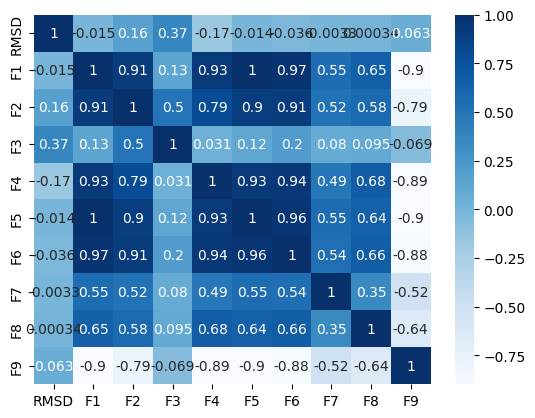

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

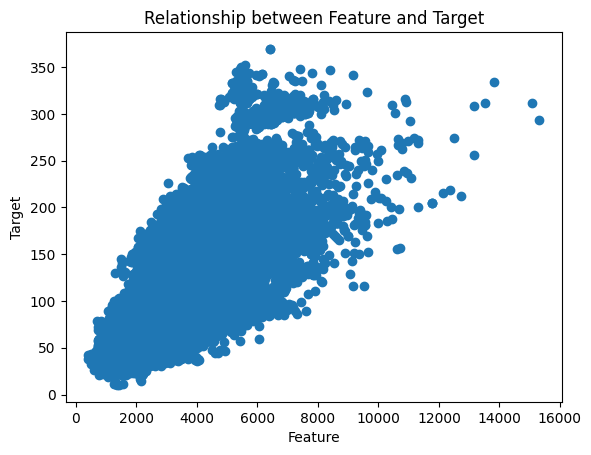

In [73]:
plt.scatter(df['F2'], df['F4'])
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Relationship between Feature and Target')
plt.show()

In [41]:
corr_matrix = df.corr()
print(corr_matrix['F4'].sort_values(ascending=False))

F4      1.000000
F6      0.938108
F1      0.931056
F5      0.925707
F2      0.793143
F8      0.676919
F7      0.485185
F3      0.031230
RMSD   -0.169771
F9     -0.891766
Name: F4, dtype: float64
